In [ ]:
!pip install tabulate

In [ ]:
!pip install scipy

In [ ]:
!pip install sympy

Welcome to Golden Section Search for Function Optimization!
+-------------+----------+----------+----------+----------+----------+----------+
|   Iteration |        a |        b |        c |        d |     f(c) |     f(d) |
+=============+==========+==========+==========+==========+==========+==========+
|           1 | 0.000000 | 1.570800 | 0.599992 | 0.970808 | 4.122611 | 5.165430 |
+-------------+----------+----------+----------+----------+----------+----------+
|           2 | 0.599992 | 1.570800 | 0.970808 | 1.199984 | 5.165430 | 5.079106 |
+-------------+----------+----------+----------+----------+----------+----------+
|           3 | 0.599992 | 1.199984 | 0.829169 | 0.970808 | 4.941822 | 5.165430 |
+-------------+----------+----------+----------+----------+----------+----------+
|           4 | 0.829169 | 1.199984 | 0.970808 | 1.058345 | 5.165430 | 5.195508 |
+-------------+----------+----------+----------+----------+----------+----------+
|           5 | 0.970808 | 1.199984 | 

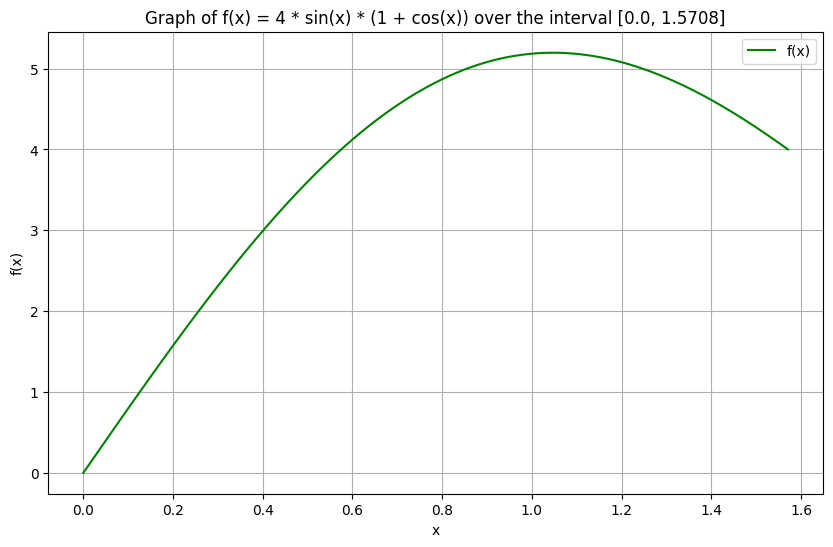

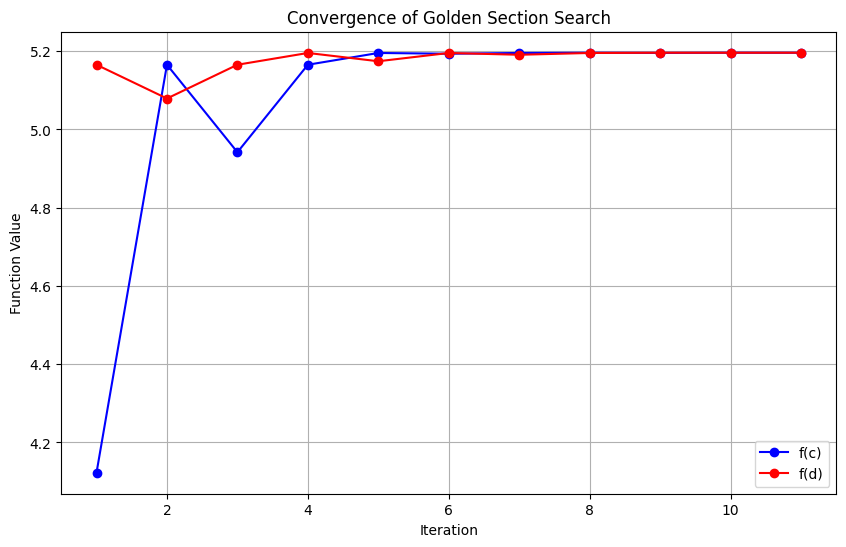

In [4]:
import numpy as np
import sympy as sp
from tabulate import tabulate
import matplotlib.pyplot as plt

# Golden Section Search function using iteration formula
def golden_section_search(func, lower_limit, upper_limit, tolerance):
    # Golden ratio constant
    phi = (1 + np.sqrt(5)) / 2
    
    # Initialize the variables
    a = lower_limit
    b = upper_limit
    iterations = 0
    table = []
    
    # Continue the search while the interval size is larger than the tolerance
    while (b - a) > tolerance:
        # Calculate the two interior points
        c = b - (b - a) / phi
        d = a + (b - a) / phi
        
        # Evaluate the function at the two points
        fc = func(c)
        fd = func(d)
        
        # Store the table of values for each iteration
        table.append([iterations + 1, round(a, 6), round(b, 6), round(c, 6), round(d, 6), round(fc, 6), round(fd, 6)])
        
        # Narrow down the interval
        if fc > fd:
            b = d
        else:
            a = c
        
        iterations += 1
    
    # The optimal value is the midpoint of the final interval
    optimal_value = (a + b) / 2
    optimal_value = round(optimal_value, 6)
    
    # Display the result table using tabulate
    headers = ["Iteration", "a", "b", "c", "d", "f(c)", "f(d)"]
    print(tabulate(table, headers=headers, tablefmt="grid", floatfmt=".6f"))
    
    return optimal_value, table

def safe_eval(expr, x_value):
    """Evaluates the mathematical expression safely using sympy."""
    x = sp.symbols('x')
    func = sp.sympify(expr)
    return float(func.subs(x, x_value))

# User input section
print("Welcome to Golden Section Search for Function Optimization!")

lower_limit = float(input("Enter lower limit: "))
upper_limit = float(input("Enter upper limit: "))
tolerance = float(input("Enter tolerance (e.g., 0.01): "))
expr = input("Enter the function to optimize (e.g., 'sin(x)', 'x**2 - 4*x + 6', 'cos(x)'): ")

# Example: Function that the user enters in string form
def user_function(x):
    return safe_eval(expr, x)

# Perform the optimization
optimal_value, table = golden_section_search(user_function, lower_limit, upper_limit, tolerance)
print(f"\nOptimal value: {optimal_value}")

# Plotting Function vs x (f(x) vs x graph)
def plot_function_vs_x(func, lower_limit, upper_limit):
    # Generate x values between the given limits
    x_vals = np.linspace(lower_limit, upper_limit, 1000)
    # Evaluate f(x) for each x value
    y_vals = [func(x) for x in x_vals]
    
    # Plot f(x) vs x
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='f(x)', color='green')
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title(f"Graph of f(x) = {expr} over the interval [{lower_limit}, {upper_limit}]")
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot f(x) vs x
plot_function_vs_x(user_function, lower_limit, upper_limit)

# Plot the convergence of the Golden Section Search
def plot_convergence(table):
    # Extract values for plotting
    iterations = [row[0] for row in table]
    f_c_values = [row[5] for row in table]
    f_d_values = [row[6] for row in table]

    # Plot the values of f(c) and f(d) over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, f_c_values, label="f(c)", marker='o', linestyle='-', color='blue')
    plt.plot(iterations, f_d_values, label="f(d)", marker='o', linestyle='-', color='red')
    plt.xlabel("Iteration")
    plt.ylabel("Function Value")
    plt.title("Convergence of Golden Section Search")
    plt.legend()
    plt.grid(True)
    plt.show()

# After the optimization is complete, call the plotting function for convergence
plot_convergence(table)


### Golden Section Search Algorithm for Polynomial Optimization: A Comprehensive Overview

#### Abstract

The **Golden Section Search** (GSS) is an efficient numerical optimization technique employed for locating the minimum of a unimodal function. It is especially useful in cases where explicit analytical solutions are difficult to derive or computationally expensive. This paper explores the implementation of the Golden Section Search algorithm applied to polynomial functions, offering a detailed examination of the method's functionality, key variables, iterative process, and its practical applications. Additionally, we provide a code-based solution to solve polynomial optimization problems, complete with iterative tables and graphical representations to enhance the understanding of the convergence process.

#### Introduction

Optimization problems are commonplace in various scientific, engineering, and economic disciplines, often requiring efficient methods for locating the minimum or maximum of functions. In particular, the **Golden Section Search** algorithm stands out for its simplicity and efficacy, especially when dealing with unimodal functions where other optimization methods may be computationally costly. The Golden Section Search minimizes the number of function evaluations necessary to identify the optimal point within a given interval, making it ideal for problems where function evaluations are resource-intensive or expensive.

This paper introduces a Python-based implementation of the Golden Section Search applied to polynomial optimization. By leveraging the Golden Ratio to divide the search interval into sections, this method efficiently narrows down the potential location of the minimum. The output of the algorithm includes both tabular data showing the progression of each iteration and graphical representations that illustrate how the optimization converges over time.

#### Key Variables and Concepts

1. **Interval Bounds (`a` and `b`)**:
   The search is performed within the initial interval `[a, b]`. The algorithm iteratively narrows this interval based on the evaluations at the intermediate points `x1` and `x2`. These bounds are specified by the user.

2. **Golden Ratio**:
   The Golden Section Search algorithm employs the **Golden Ratio**, approximately 0.618, to determine two intermediate points (`x1` and `x2`) within the interval. The ratio optimizes the search process by minimizing the number of iterations required to find the minimum.

3. **Iteration Points (`x1` and `x2`)**:
   The initial positions of `x1` and `x2` are computed based on the Golden Ratio. Subsequent iterations refine the positions of these points to progressively hone in on the minimum of the function.

4. **Function Values (`f(x1)` and `f(x2)`)**:
   At each iteration, the function values at `x1` and `x2` are computed. The values determine which portion of the search interval to discard, effectively narrowing the search space.

5. **Tolerance**:
   A user-defined stopping criterion for the algorithm. The search terminates once the difference between `a` and `b` is less than the tolerance, ensuring that the optimal solution is found within a desired level of precision.

6. **Iterations**:
   The algorithm proceeds iteratively, with each iteration reducing the size of the search interval. The number of iterations is determined by the initial interval size and the tolerance value.

7. **Plotting**:
   The iterative process is visualized through a plot showing the evolution of the function values at `x1` and `x2`. This provides a graphical representation of how the algorithm converges to the minimum.

#### Algorithm Overview

The Golden Section Search operates as follows:

1. **Initial Setup**:
   - The user specifies the polynomial function, the search interval `[a, b]`, and the tolerance.
   - The initial points `x1` and `x2` are calculated using the Golden Ratio. These points are used to evaluate the function.

2. **Iterative Search**:
   - The function is evaluated at `x1` and `x2`. Based on the function values at these points (`f(x1)` and `f(x2)`), the algorithm determines which half of the interval to discard.
   - The process repeats, progressively narrowing the search space until the interval size is sufficiently small (as determined by the tolerance).

3. **Convergence**:
   Once the interval is sufficiently reduced, the algorithm terminates. The function returns the point corresponding to the minimum function value, either `x1` or `x2`.

4. **Results**:
   A detailed table is generated showing the values of `x1`, `x2`, `f(x1)`, `f(x2)`, and the interval size at each iteration. A graphical plot is also produced, illustrating the convergence of the algorithm.

#### Implementation

The algorithm has been implemented in Python, utilizing the `numpy` and `matplotlib` libraries for numerical computations and visualization, respectively. The implementation consists of two key classes: `GoldenSectionSearch` for performing the optimization and `Polynomial` for evaluating polynomials.

**GoldenSectionSearch Class**:
This class implements the Golden Section Search algorithm, which iteratively reduces the search interval until the minimum of the function is located. The `optimize` method performs the search, while the `visualize_results` method generates graphical representations of the optimization process.

**Polynomial Class**:
This class allows the user to define a polynomial by specifying its coefficients. The polynomial is then evaluated at specific points using the `evaluate` method.

#### Results and Output

The algorithm's output includes:
1. **Tabular Iteration Data**:
   A table displaying the iteration number, values of `x1` and `x2`, the interval bounds (`a`, `b`), and the corresponding function values (`f(x1)` and `f(x2)`), as well as the current interval size.

   Example:
   ```
   | Iteration |     x1     |     x2     |     a      |     b      |   f(x1)   |   f(x2)   |
   |-----------|------------|------------|------------|------------|-----------|-----------|
   |    0      |   0.500000 |   1.500000 |   0.000000 |   2.000000 |   1.000000 |   2.000000 |
   |    1      |   0.750000 |   1.250000 |   0.000000 |   1.500000 |   1.062500 |   1.562500 |
   ```

2. **Convergence Plot**:
   A plot showing the evolution of the function values at `x1` and `x2` over successive iterations, providing a clear visual representation of how the search narrows towards the minimum.

3. **Optimal Result**:
   The final result, indicating the optimal point `x` and the corresponding function value `f(x)`, as well as the total number of iterations and the final interval size.

#### Visualizations

1. **Function Plot**: A plot of the function within the search interval, displaying the evolution of the search points (`x1` and `x2`) and the shrinking search interval.
2. **Convergence of Function Values**: A plot that tracks the function values at `x1` and `x2` across iterations, showing how the algorithm converges towards the minimum.
3. **Interval Size Reduction**: A plot that visualizes the logarithmic reduction of the search interval size as the algorithm progresses.

#### Practical Applications

The Golden Section Search algorithm is widely applicable across various domains, including:

- **Engineering**: Optimizing material usage, structural design, and system efficiency.
- **Machine Learning**: Tuning hyperparameters to maximize model performance.
- **Economics and Finance**: Optimizing portfolios, minimizing costs, or maximizing returns under certain constraints.
- **Resource Allocation**: Identifying efficient allocation strategies in fields like energy distribution, supply chain management, and budget allocation.

#### Conclusion

The Golden Section Search algorithm provides an efficient and reliable method for solving polynomial optimization problems. By iteratively narrowing the search space, it achieves convergence to the optimal solution with a minimal number of function evaluations. The implementation presented in this paper offers a practical and flexible approach for polynomial optimization, including detailed iteration data and graphical visualizations that enhance the understanding of the optimization process.